<a href="https://colab.research.google.com/github/sashutosh/DeepLearning/blob/master/SampleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions for updating:
non-resource variables are not supported in the long term


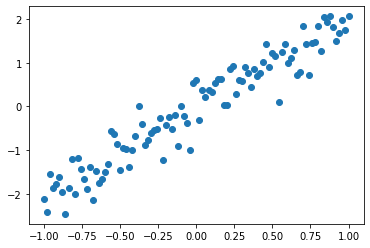

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np                                                 
import matplotlib.pyplot as plt                                    

learning_rate = 0.01
training_epochs = 100

x_train = np.linspace(-1, 1, 101)                                  
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33     

plt.scatter(x_train, y_train)                                      
plt.show()                    

In [12]:
#setup input and output nodes as placeholders that will be injected via x_train and y_train
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

#define model = X*w 
def model(X, w): 
  return tf.multiply(X,w)

#define weight variables
w = tf.Variable(0.0, name="weights")

#define the cost function
y_model = model(X,w)
cost = tf.square(Y-y_model)


In [13]:
#define the optimizer
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [14]:
#set up a sesssion and initialize all variables
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [18]:
#loop through multiple iterations
for epoch in range(training_epochs):
  for(x,y) in zip(x_train,y_train):           #for each datapoint in training set
    sess.run(train_op,feed_dict={X: x,Y: y})  #train the model to minimize the cost function


In [19]:
#get the final parameter value
w_val = sess.run(w)

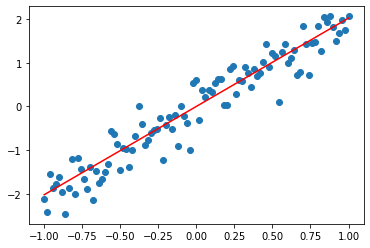

In [20]:
sess.close()
#plot the original data
plt.scatter(x_train,y_train)
y_learned = x_train * w_val
#plot the fitted line
plt.plot(x_train, y_learned, 'r')
plt.show( )